<a href="https://colab.research.google.com/github/TrinhHoangKhang/AIO-2024/blob/main/Homework/Module4/Week1/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Get the data
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 14.5MB/s]


In [3]:
# Read the csv
df = pd.read_csv('/content/advertising.csv')
df.info()
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [44]:
# Prepare X, y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [16]:
# Question 1
ques1 = [ sum ( X [:5, 0]) , sum ( X [:5, 1]) , sum ( X [:5, 2]) , sum ( y [:5]) ]
print(ques1)

[624.1, 175.10000000000002, 300.5, 78.9]


---

In [41]:
def initialize_params():
  return (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)

def predict(x1, x2, x3, w1, w2, w3, b):
  return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss_mse(y, y_hat):
  return (y_hat - y)**2

def compute_gradient_wi(x, y, y_hat):
  return 2 * x * (y_hat - y)

def compute_gradient_b(y, y_hat):
  return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
  w_new = wi - lr * dl_dwi
  return w_new

def update_weight_b(b, dl_db, lr):
  w_new = b - lr * dl_db
  return w_new

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[i][0]
            x2 = X_data[i][1]
            x3 = X_data[i][2]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return w1, w2, w3, b, losses


In [45]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )

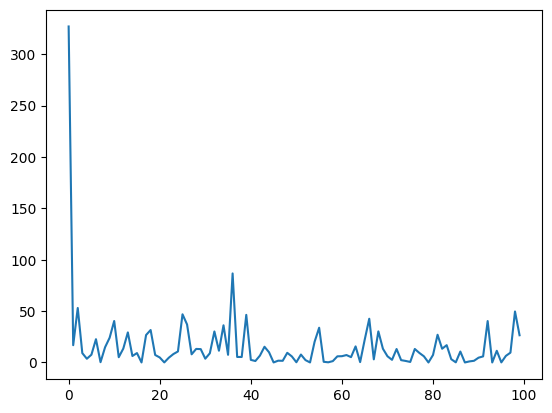

In [46]:
plt.plot(losses[:100])

In [47]:
print(w1, w2, w3, b)

0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846


---

In [50]:
tv = 19.2
radio = 35.9
newspaper = 51.3

( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f' predicted sales is { sales } ')

 predicted sales is 8.176413319549823 


---

In [62]:
def initialize_params():
  return (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)

def predict(x1, x2, x3, w1, w2, w3, b):
  return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss_mse(y, y_hat):
  return (y_hat - y)**2

def compute_gradient_wi(x, y, y_hat):
  return 2 * x * (y_hat - y)

def compute_gradient_b(y, y_hat):
  return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
  w_new = wi - lr * dl_dwi
  return w_new

def update_weight_b(b, dl_db, lr):
  w_new = b - lr * dl_db
  return w_new

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        total_loss = 0
        total_dl_dw1 = 0
        total_dl_dw2 = 0
        total_dl_dw3 = 0
        total_dl_db = 0

        for i in range(N):
            # Get a sample
            x1 = X_data[i][0]
            x2 = X_data[i][1]
            x3 = X_data[i][2]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Acumulate
            total_loss += loss
            total_dl_dw1 += dl_dw1
            total_dl_dw2 += dl_dw2
            total_dl_dw3 += dl_dw3
            total_dl_db += dl_db

        w1 = update_weight_wi(w1, total_dl_dw1/N, lr)
        w2 = update_weight_wi(w2, total_dl_dw2/N, lr)
        w3 = update_weight_wi(w3, total_dl_dw3/N, lr)
        b = update_weight_wi(b, total_dl_db/N, lr)
        losses.append(total_loss/N)

    return w1, w2, w3, b, losses


In [71]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max =50 , lr =1e-5)


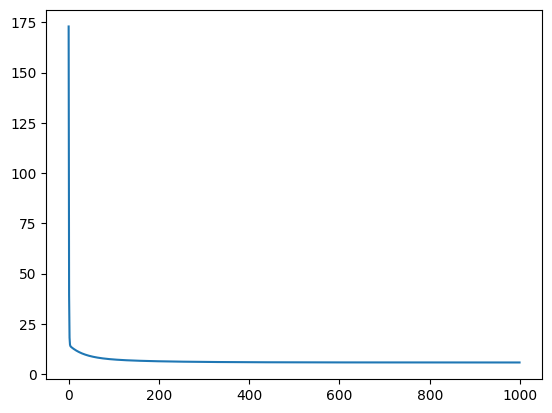

In [69]:
plt.plot(losses)

In [72]:
print(w1, w2, w3)

0.0777391352775665 0.05644769904625777 0.04135488482198375


---


In [92]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
ones = np.ones((len(X), 1))
X = np.hstack((X, ones))
print(X[0])
print(X.shape)

[230.1  37.8  69.2   1. ]
(200, 4)


In [85]:
def initialize_params():
  gauss = random.gauss(mu=0, sigma=0.01)
  return (gauss, gauss, gauss, 0)

def compute_loss_mse(w, xi, yi):
  return (np.dot(w, xi) - yi)**2

def compute_gradient(w, xi, yi):
 return xi * (2 * (np.dot(w, xi) - yi))

def update_weight(w, grad, lr):
  w = w - lr * grad
  return w

def final_linear_regression(X, y, lr=1e-5, max_epochs=50):
  N = len(X)
  w = initialize_params()
  losses = []
  for _ in range(max_epochs):
    for i in range(N):
      # Get a sample in the dataset
      xi = X[i]
      yi = y[i]

      # Compute the loss function of that sample
      loss = compute_loss_mse(w, xi, yi)

      # Compute the gradient
      grad = compute_gradient(w, xi, yi)

      # Update the parameter
      w = update_weight(w, grad, lr)

      # Log
      losses.append(loss)

  return w, losses

In [90]:
w, losses = final_linear_regression(X, y)

31.336264575328613


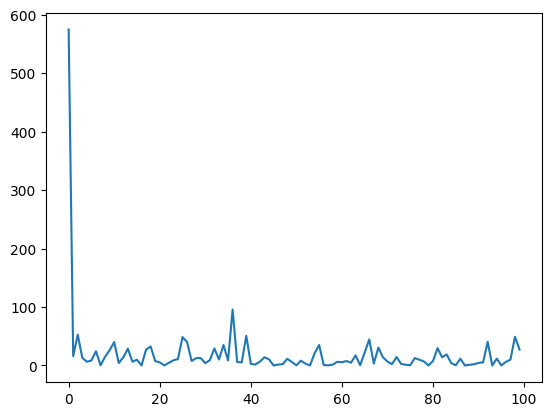

In [94]:
plt.plot(losses[:100])
print(losses[9999])